# Clustering
------
## Intro

In [1]:
import pandas as pd
import numpy as np
import os
import pickle

import matplotlib.pyplot as plt
from skimage import io

from sklearn.cluster import KMeans
from bfw import BFWEmbeddings

In [2]:
N_CLUSTERS = 100
DATA_ROOT = os.path.abspath( './../data/bfw/uncropped-face-samples' )
EMBEDDINGS_FILE = os.path.join(DATA_ROOT, 'facenet_embeddings_thrhld095.pickle')
GRID_SIZE = 10

## Loading embeddings

In [3]:
print("Reading embeddings from", EMBEDDINGS_FILE)
with open(EMBEDDINGS_FILE, 'rb') as file:
    path2emb = pickle.load(file)
    
idx2path = list(path2emb.keys())
n_embeddings = len(idx2path)

embeddings = np.zeros( (n_embeddings, 512) )
for i,path in enumerate(idx2path):
    embeddings[i] = path2emb[path]

print("Found {} embeddings".format(n_embeddings))

Reading embeddings from /home/jip/Desktop/FACT_AI/re-faircal/data/bfw/uncropped-face-samples/facenet_embeddings_thrhld095.pickle
Found 18583 embeddings


## Some stats

In [4]:
paths = set( idx2path )

df_full = pd.read_csv('./../data/bfw/bfw-v0.1.5-datatable.csv')
mask = (df_full['p1'].isin(paths)) & (df_full['p2'].isin(paths))
df_embedded = df_full[mask]

print("Full BFW contains {} pairs".format(len(df_full)))
print("Embeddings allow the use of {} pairs".format(len(df_embedded)))

Full BFW contains 923898 pairs
Embeddings allow the use of 798165 pairs


## Clustering

In [5]:
print("Running KMeans...")
kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(embeddings)

Running KMeans...


KMeans(n_clusters=100)

## Predicting

In [6]:
clusters: list[set[str]] = [set() for _ in range(N_CLUSTERS)]
for i_emb, i_cluster in enumerate(kmeans.labels_):
    clusters[i_cluster].add( idx2path[i_emb] )

Cluster   0 contains  209 images
Cluster   1 contains  227 images
Cluster   2 contains  215 images
Cluster   3 contains  162 images


KeyboardInterrupt: 

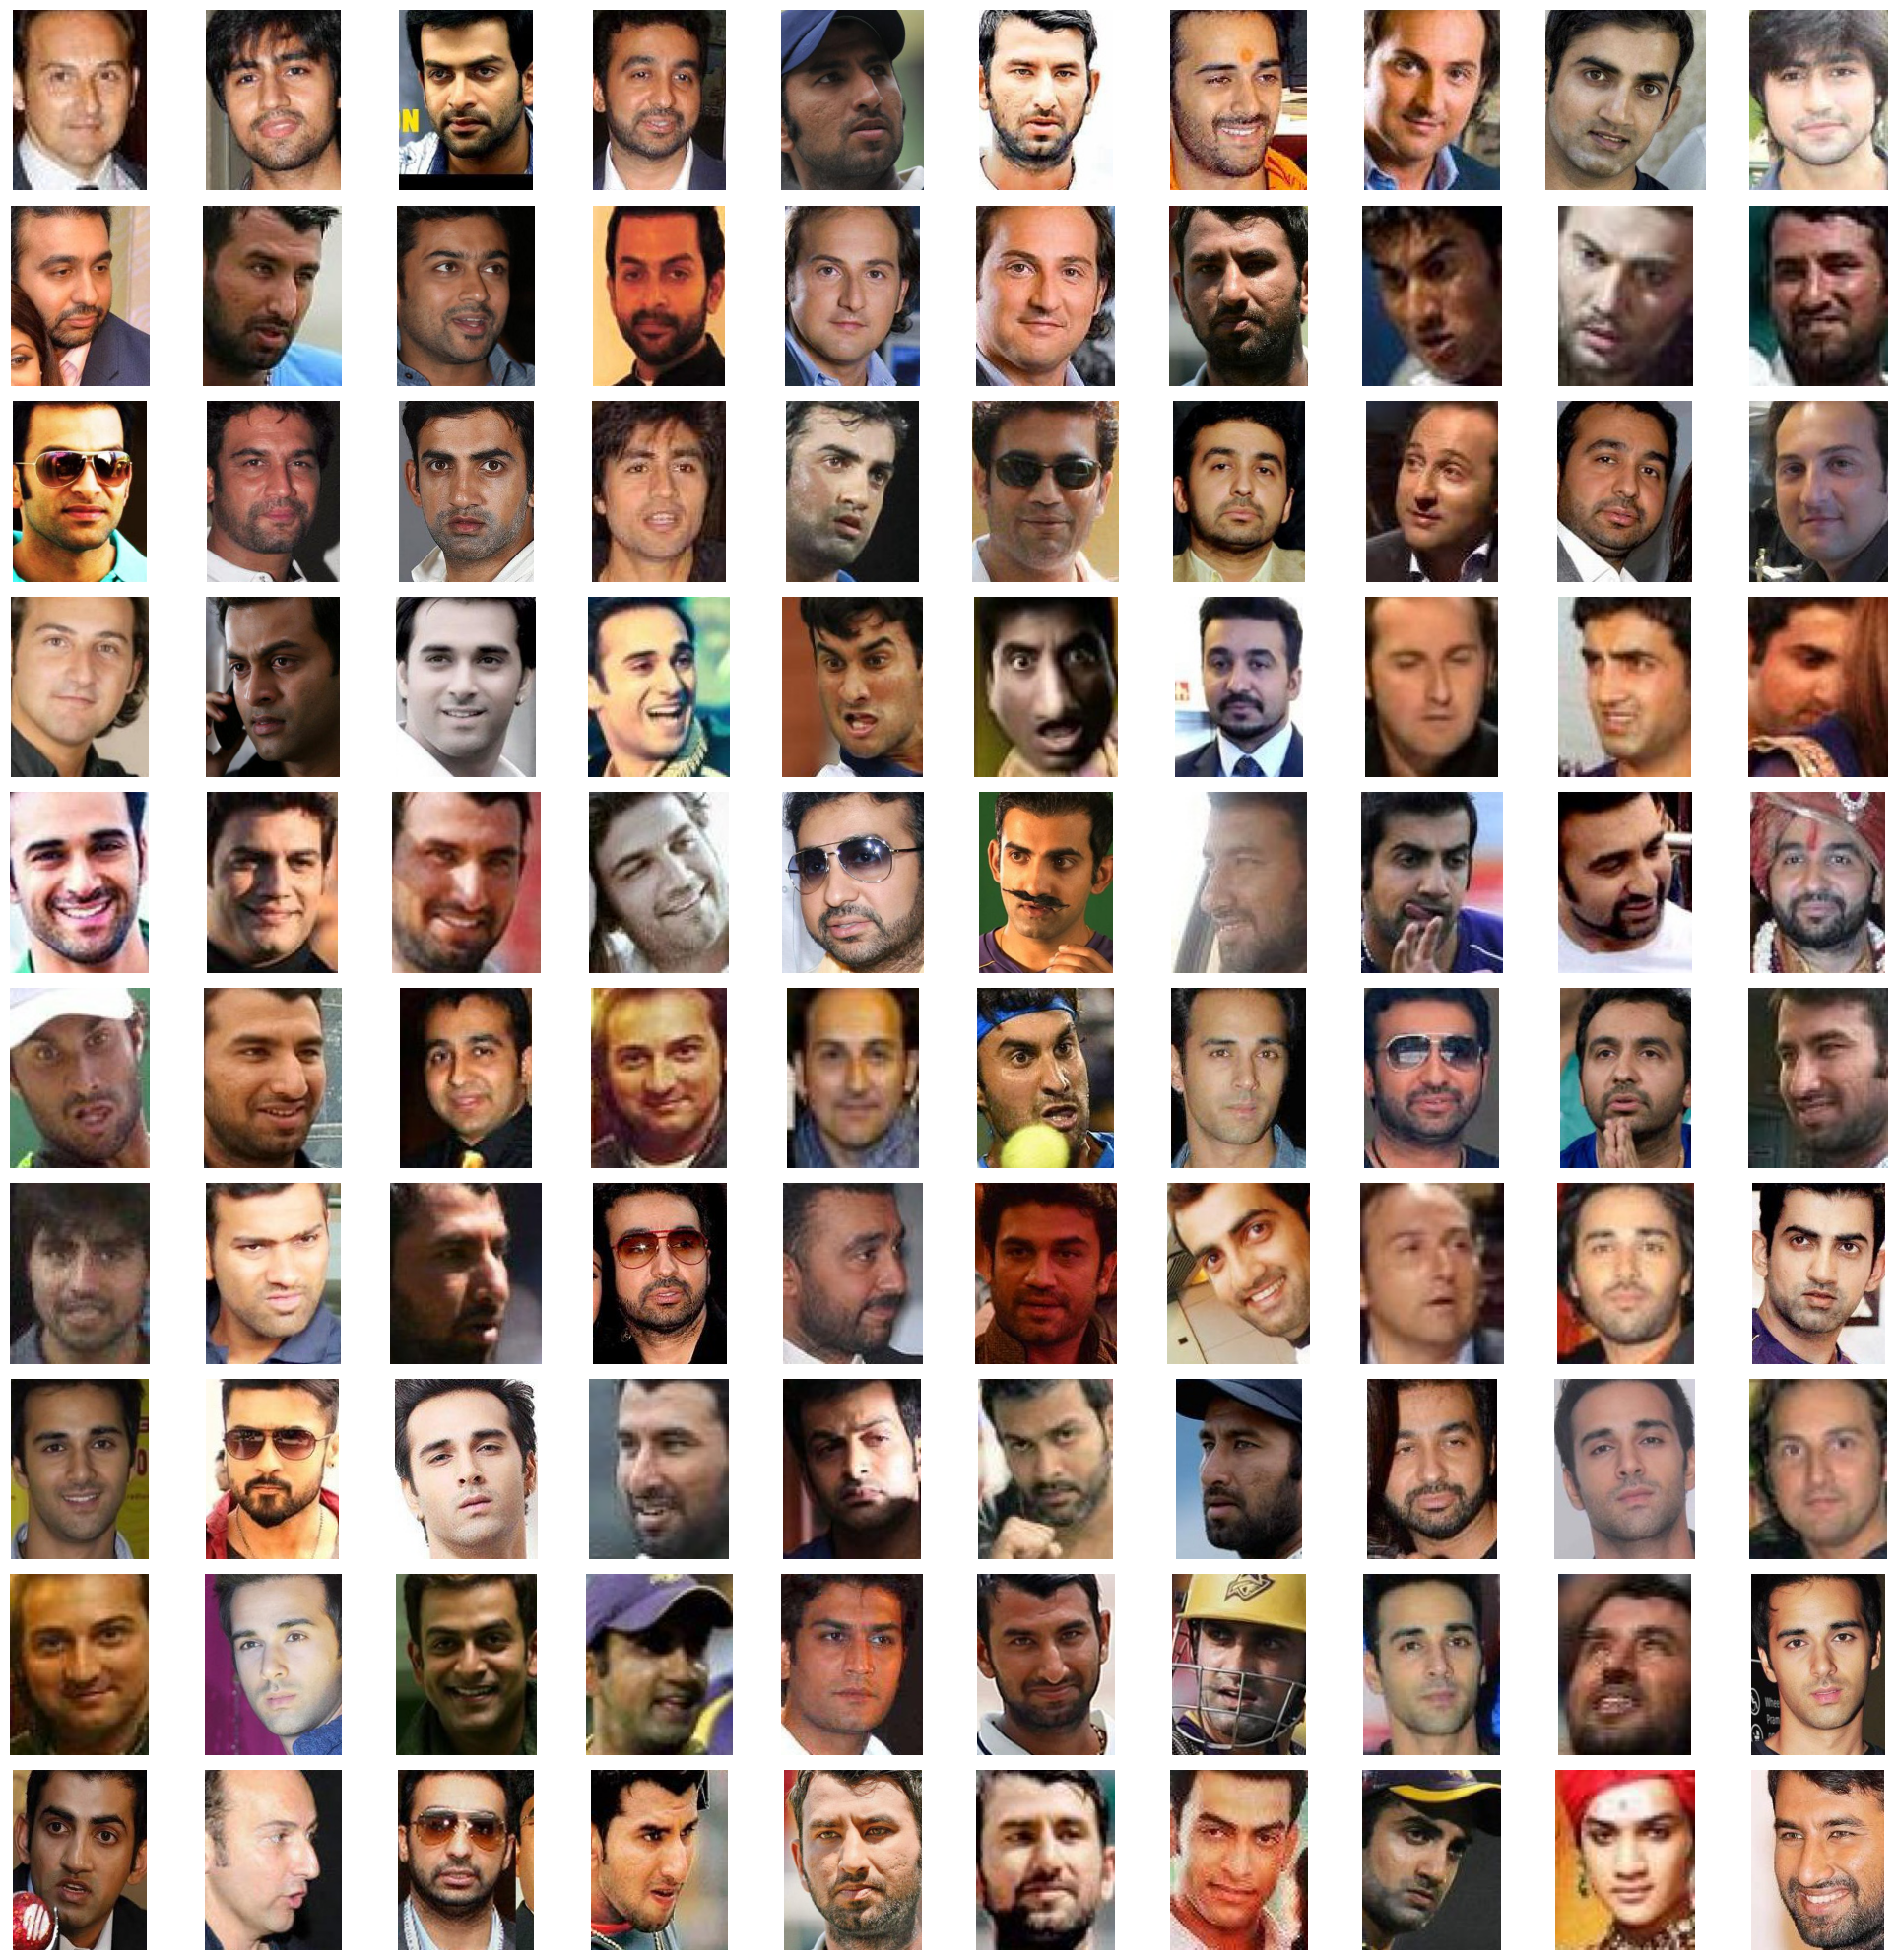

In [7]:
for i_cluster,paths in enumerate(clusters):
    print("Cluster {:3} contains {:4} images".format(i_cluster, len(paths)))
    
    if len(paths) >= GRID_SIZE*GRID_SIZE:
        fig, axs = plt.subplots(GRID_SIZE, GRID_SIZE, figsize=(20,20))
        axs = axs.flatten()
        for path, ax in zip(paths, axs):
            ax.imshow(io.imread(os.path.join(DATA_ROOT, path)))
            ax.set_axis_off()
        plt.tight_layout()
        plt.savefig(f"cluster_{i_cluster}.png")
        plt.close(fig)